## Polytope Climate-DT Time Series example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [1]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [2]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [3]:
import earthkit.data
from earthkit.plots.interactive import Chart
from polytope.api import Client

In [ ]:
# Set True if you want to make a live request for the data, or false if you want to use the cached grib file
LIVE_REQUEST = True

In [1]:
LOCATION = ((38, -9.5))

In [2]:
request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": "20200101/to/20210101",
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "0000/to/2300",
    "feature": {
        "type" : "timeseries",
        "points": [[LOCATION[0], LOCATION[1]]],
        "time_axis": "date",
    }
}

In [ ]:
data_file = "data/climate-dt-earthkit-fe-timeseries.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

In [8]:
def location_to_string(location):
    """
    Converts latitude and longitude to a string representation with degrees
    and N/S/E/W.
    """
    (lat, lon) = location
    lat_dir = "N" if lat >= 0 else "S"
    lon_dir = "E" if lon >= 0 else "W"
    return f"{abs(lat):.2f}°{lat_dir}, {abs(lon):.2f}°{lon_dir}"

In [9]:
ds = data.to_xarray()
ds

<xarray.Dataset> Size: 141kB
Dimensions:    (latitude: 1, longitude: 1, levelist: 1, number: 1, datetime: 1,
                t: 8808)
Coordinates:
  * latitude   (latitude) float64 8B 37.97
  * longitude  (longitude) float64 8B 350.5
  * levelist   (levelist) int64 8B 0
  * number     (number) int64 8B 0
  * datetime   (datetime) <U20 80B '2021-01-01 00:00:00Z'
  * t          (t) datetime64[ns] 70kB 2020-01-01 ... 2021-01-01T23:00:00
Data variables:
    2t         (latitude, longitude, levelist, number, datetime, t) float64 70kB ...
Attributes: (12/14)
    activity:       scenariomip
    class:          d1
    dataset:        climate-dt
    experiment:     ssp3-7.0
    expver:         0001
    generation:     1
    ...             ...
    realization:    1
    resolution:     high
    stream:         clte
    type:           fc
    number:         0
    Forecast date:  2021-01-01 00:00:00Z

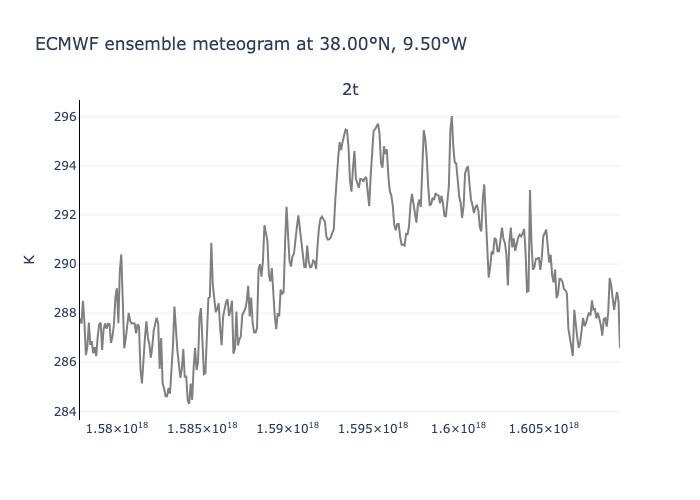

In [12]:
TIME_FREQUENCY = "1d"
QUANTILES = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]

chart = Chart()
chart.title(f"ECMWF ensemble meteogram at {location_to_string(LOCATION)}")
#chart.box(ds, time_frequency=TIME_FREQUENCY, quantiles=QUANTILES)
chart.line(ds, line_color='grey', time_frequency=TIME_FREQUENCY)
chart.show("png") # Replace with chart.show() in an interactive session!